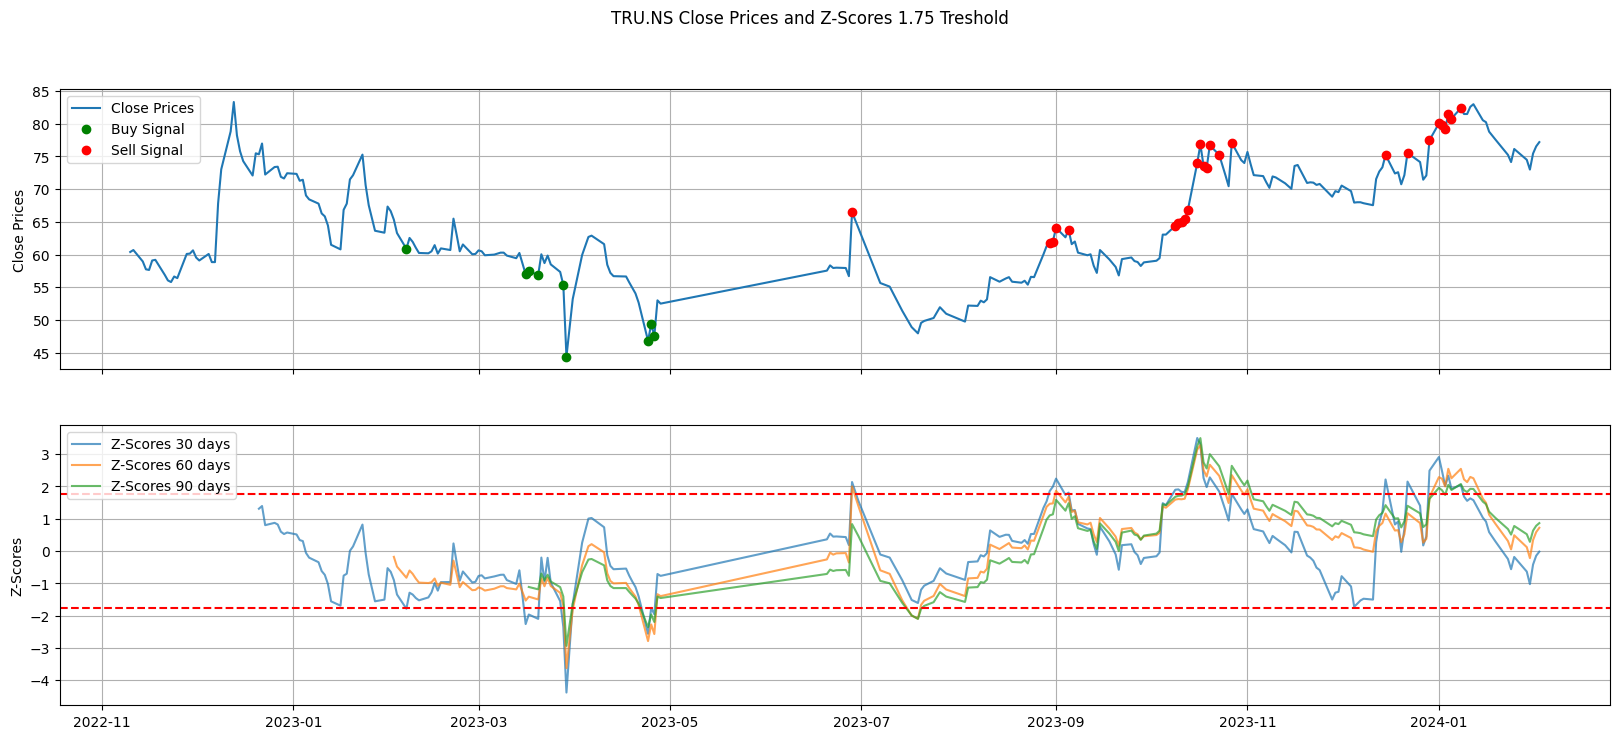

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Constants
Z_THRESH = 1.75
PERIODS = [30, 60, 90]
TICKER_SYMBOL = "TRU.NS"
START_DATE = '2020-1-1'
END_DATE = '2024-02-05'


def fetch_data(ticker_symbol, start_date, end_date):
    """Fetches historical data for a given ticker symbol."""
    ticker_data = yf.Ticker(ticker_symbol)
    return ticker_data.history(period='1d', start=start_date, end=end_date)

def calculate_z_scores(close_prices, periods):
    """Calculates Z-scores for given periods."""
    z_scores_dict = {}
    for period in periods:
        # Calculate the rolling mean for the given period
        rolling_mean = close_prices.rolling(window=period).mean()      
        # Calculate the rolling standard deviation for the given period
        rolling_std = close_prices.rolling(window=period).std()       
        # Compute the Z-scores for the close prices
        z_scores = (close_prices - rolling_mean) / rolling_std      
        # Store the Z-scores in the dictionary with the period as the key
        z_scores_dict[period] = z_scores
    return z_scores_dict

def plot_data(close_prices, z_scores_data):
    """Plots close prices and z-scores."""   
    
    # Create subplots for close prices and Z-scores
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20, 8))   
    
    # Plot the close prices on the first subplot
    ax1.plot(close_prices.index, close_prices, label='Close Prices')
    for period, z_scores in z_scores_data.items():
        # Plot the Z-scores on the second subplot for each period
        ax2.plot(z_scores.index, z_scores, label=f'Z-Scores {period} days', alpha=0.7)       
        # If the period is the first in the list, plot buy/sell signals on the first subplot
        if period == PERIODS[0]:
            buy_signals = (z_scores < -Z_THRESH)
            sell_signals = (z_scores > Z_THRESH)
            ax1.plot(close_prices[buy_signals].index, close_prices[buy_signals], 'o', color='g', label='Buy Signal')
            ax1.plot(close_prices[sell_signals].index, close_prices[sell_signals], 'o', color='r', label='Sell Signal')
    # Set the y-label and legend for the close prices subplot
    ax1.set_ylabel('Close Prices')
    ax1.legend(loc="upper left")
    ax1.grid(True)
    
    # Draw horizontal lines indicating the Z-score thresholds on the Z-scores subplot
    ax2.axhline(-Z_THRESH, color='red', linestyle='--')
    ax2.axhline(Z_THRESH, color='red', linestyle='--')   
    # Set the y-label and legend for the Z-scores subplot
    ax2.set_ylabel('Z-Scores')
    ax2.legend(loc="upper left")
    ax2.grid(True)

    # Set the main title for the entire plot
    plt.suptitle(f'{TICKER_SYMBOL} Close Prices and Z-Scores {Z_THRESH} Treshold')
    # Display the plots
    plt.show()

# Fetch the historical data for the ticker symbol
ticker_data = fetch_data(TICKER_SYMBOL, START_DATE, END_DATE)

# Calculate Z-scores for the specified periods
z_scores_data = calculate_z_scores(ticker_data['Close'], PERIODS)

# Plot the close prices and Z-scores
plot_data(ticker_data['Close'], z_scores_data)


In [1]:
!pip install vectorbt


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 527.2/527.2 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 9.6 MB/s eta 0:00:00
     -------------------------------------- 139.4/139.4 kB 8.1 MB/s eta 0:00:00
     -------------------------------------- 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     -------------------------------------- 295.0/295.0 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 313.3/313.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 10.4 MB/s eta 0:00:00
     -------------------------------------- 214.9/214.9 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 8.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import vectorbt as vbt
import yfinance as yf

In [3]:


# Function to download ticker data
def download_ticker_data(ticker, start_date, end_date, candle_time_frame):
    data = yf.download(ticker, start=start_date, end=end_date, interval=candle_time_frame)
    return data

# Function to add MACD indicator to the DataFrame
def add_macd_indicator(dataframe):
    macd_indicator = vbt.MACD.run(dataframe['Close'])
    dataframe['MACD'] = macd_indicator.macd
    dataframe['Signal'] = macd_indicator.signal
    dataframe['Hist'] = macd_indicator.hist
    dataframe['MACD_above_Signal'] = macd_indicator.macd_above(macd_indicator.signal)
    dataframe['MACD_below_Signal'] = macd_indicator.macd_below(macd_indicator.signal)
    return dataframe

# Function to compare the performance of each strategy
def compare_strategy_performance(dataframe):
    # Create a portfolio for MACD above Signal
    portfolio_macd_above = vbt.Portfolio.from_signals(dataframe.index, dataframe['MACD_above_Signal'], ~dataframe['MACD_above_Signal'])
    
    # Create a portfolio for MACD below Signal
    portfolio_macd_below = vbt.Portfolio.from_signals(dataframe.index, dataframe['MACD_below_Signal'], ~dataframe['MACD_below_Signal'])
    
    # Create a buy and hold portfolio
    buy_and_hold = vbt.Portfolio.from_holding(dataframe.index, init_cash=100)
    
    # Compare the performance
    performance_dict = {
        'MACD_above_Signal': portfolio_macd_above.total_return(),
        'MACD_below_Signal': portfolio_macd_below.total_return(),
        'Buy_and_Hold': buy_and_hold.total_return()
    }
    return performance_dict

# Example usage
if __name__ == "__main__":
    # Download data
    df = download_ticker_data('AAPL', '2020-01-01', '2021-01-01', '1d')
    
    # Add MACD indicator
    df_with_macd = add_macd_indicator(df)
    
    # Compare strategy performance
    performance = compare_strategy_performance(df_with_macd)
    print(performance)

[*********************100%%**********************]  1 of 1 completed


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot unify float64 and datetime64[ns] for '_price.8', defined at c:\Users\Shubham Soni\Documents\MEGAsync\stock-analyzer\stock-analyzer\Lib\site-packages\vectorbt\portfolio\nb.py (2014)
[1m
File "..\..\Lib\site-packages\vectorbt\portfolio\nb.py", line 2014:[0m
[1mdef simulate_from_signal_func_nb(target_shape: tp.Shape,
    <source elided>
                    if _val_price > 0:
[1m                        _val_price = _price  # upper bound is order price
[0m                        [1m^[0m[0m
[0m
[0m[1mDuring: typing of assignment at c:\Users\Shubham Soni\Documents\MEGAsync\stock-analyzer\stock-analyzer\Lib\site-packages\vectorbt\portfolio\nb.py (2014)[0m
[1m
File "..\..\Lib\site-packages\vectorbt\portfolio\nb.py", line 2014:[0m
[1mdef simulate_from_signal_func_nb(target_shape: tp.Shape,
    <source elided>
                    if _val_price > 0:
[1m                        _val_price = _price  # upper bound is order price
[0m                        [1m^[0m[0m


In [4]:
df_with_macd

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Hist,MACD_above_Signal,MACD_below_Signal
Date,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152641,135480400,NaN,NaN,NaN,False,False
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441467,146322800,NaN,NaN,NaN,False,False
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200,NaN,NaN,NaN,False,False
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,NaN,NaN,NaN,False,False
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844345,132079200,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.679733,54930100,3.975513,3.289152,0.686361,True,False
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317825,124486200,4.500321,3.531603,0.968718,True,False
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529419,121047300,4.845257,3.747115,1.098141,True,False


[*********************100%%**********************]  1 of 1 completed


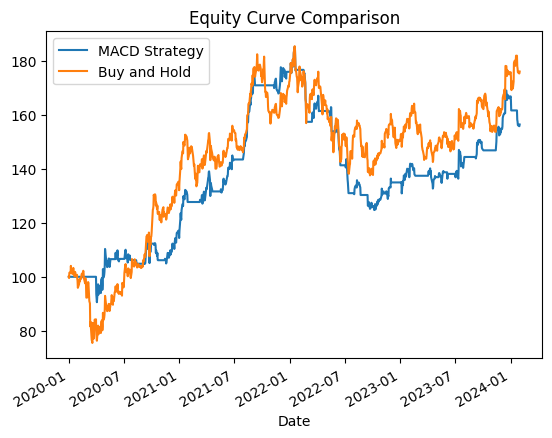

In [21]:
# import vectorbt as vbt
# import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'dataframe' with a 'Close' column
# Here's your modified function with MACD signals
def add_macd_indicator(dataframe):
    macd_indicator = vbt.MACD.run(dataframe['Close'])
    dataframe['MACD'] = macd_indicator.macd
    dataframe['Signal'] = macd_indicator.signal
    dataframe['Hist'] = macd_indicator.hist
    dataframe['MACD_above_Signal'] = macd_indicator.macd_above(macd_indicator.signal)
    dataframe['MACD_below_Signal'] = macd_indicator.macd_below(macd_indicator.signal)
    
    # Generate buy and sell signals based on crossovers
    dataframe['Buy_Signal'] = macd_indicator.macd_crossed_above(macd_indicator.signal)
    dataframe['Sell_Signal'] = macd_indicator.macd_crossed_below(macd_indicator.signal)
    
    return dataframe

# Download sample data
dataframe = download_ticker_data('TCS.NS', '2020-01-01', '2024-02-01', '1d')

# Add MACD and signals to the dataframe
dataframe_with_signals = add_macd_indicator(dataframe)

# Create entries and exits for the strategy
entries = dataframe_with_signals['Buy_Signal']
exits = dataframe_with_signals['Sell_Signal']

# Run the backtest
portfolio = vbt.Portfolio.from_signals(
    dataframe_with_signals['Close'], entries, exits, freq='1D')

# Create buy and hold strategy for comparison
buy_and_hold = vbt.Portfolio.from_holding(dataframe_with_signals['Close'], freq='1D')
portfolio.value().plot(label='MACD Strategy')
buy_and_hold.value().plot(label='Buy and Hold')
plt.title('Equity Curve Comparison')
plt.legend()
plt.show()



In [24]:
print(portfolio.sharpe_ratio())
buy_and_hold.sharpe_ratio()

0.866295047707601


0.8232034731804252

In [10]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf

# Function to identify support and resistance levels
def find_support_resistance(dataframe, window=50):
    rolling_max = dataframe['High'].rolling(window, min_periods=1).max()
    rolling_min = dataframe['Low'].rolling(window, min_periods=1).min()
    
    # Identify indices of local minima and maxima
    minima_idx = (dataframe['Low'] == rolling_min)
    maxima_idx = (dataframe['High'] == rolling_max)
    
    # Filter out minima and maxima
    support_levels = dataframe['Low'][minima_idx]
    resistance_levels = dataframe['High'][maxima_idx]
    
    return support_levels, resistance_levels

# Download historical data for a ticker
ticker = '^NSEI'
data = yf.download(ticker, start='2022-11-01', end='2024-01-01')

# Find support and resistance levels
support_levels, resistance_levels = find_support_resistance(data, window=200)

# Create a candlestick chart
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))

# Add support and resistance levels to the chart
for support_level in support_levels:
    fig.add_hline(y=support_level, line_dash="dot",
                  annotation_text="Support",
                  annotation_position="bottom right",
                  line_color="green")

for resistance_level in resistance_levels:
    fig.add_hline(y=resistance_level, line_dash="dot",
                  annotation_text="Resistance",
                  annotation_position="top right",
                  line_color="red")

# Update layout
fig.update_layout(title=f'{ticker} Support and Resistance Levels',
                  yaxis_title='Price',
                  xaxis_title='Date',
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [34]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

# Function to identify support and resistance levels
def find_support_resistance(dataframe, window=7):
    rolling_max = dataframe['High'].rolling(window, min_periods=1).max()
    rolling_min = dataframe['Low'].rolling(window, min_periods=1).min()
    
    # Identify indices of local minima and maxima
    minima_idx = (dataframe['Low'] == rolling_min)
    maxima_idx = (dataframe['High'] == rolling_max)
    
    # Filter out minima and maxima
    support_levels = dataframe['Low'][minima_idx]
    resistance_levels = dataframe['High'][maxima_idx]
    
    return support_levels, resistance_levels

# Function to merge nearby key levels
def find_key_levels(support_levels, resistance_levels, tolerance):
    key_levels = pd.concat([support_levels, resistance_levels]).sort_values()
    merged_key_levels = []
    current_level = key_levels.iloc[0]
    
    for level in key_levels:
        if abs(level - current_level) <= tolerance:
            current_level = (current_level + level) / 2
        else:
            merged_key_levels.append(current_level)
            current_level = level
    merged_key_levels.append(current_level)
    
    return merged_key_levels

# Download historical data for a ticker
ticker = 'WIPRO.NS'
data = yf.download(ticker, start='2023-01-01', end='2024-02-08', interval='1d')

# Find support and resistance levels
support_levels, resistance_levels = find_support_resistance(data, window=20)

# Define a tolerance, e.g., 1% of the mean price
mean_price = data['Close'].mean()
tolerance = mean_price * 0.025  # 1% tolerance

# Find merged key levels
key_levels = find_key_levels(support_levels, resistance_levels, tolerance)

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

# Add key levels to the chart
for level in key_levels:
    fig.add_hline(y=level, line_dash="dash", line_color="blue")

# Update layout
fig.update_layout(title=f'{ticker} Candlestick Chart with Key Levels',
                  yaxis_title='Price',
                  xaxis_title='Date',
                  width=1000,  # Width of the figure in pixels
                  height=600,  # Heigh
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()



[*********************100%%**********************]  1 of 1 completed
